In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
file_path = "C:/Users/Srnzzz/Documents/GitHub/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv"

In [56]:
# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv(file_path)
df.shape

(2443651, 9)

In [32]:
# 1. **Crosstab Analysis**:
#    - Create a crosstab between the product `category` and the `isBestSeller` status.
#    - Are there categories where being a best-seller is more prevalent? 
#    *Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion 
#     in descending order.*

crosstab_result = pd.crosstab(df['category'], df['isBestSeller']).sort_values(by=True, ascending=False)
crosstab_result["BestSeller_share"] = round(crosstab_result[True] / (crosstab_result[False] + crosstab_result[True]),2)
crosstab_result.sort_values(by='BestSeller_share', ascending=False)

isBestSeller,False,True,BestSeller_share
category,,,
Grocery,9008,556,0.06
Health & Personal Care,9017,552,0.06
Smart Home Security & Lighting,98,6,0.06
Mobile Phone Accessories,248,11,0.04
Power & Hand Tools,8353,306,0.04
...,...,...,...
Home Office Furniture,2454,8,0.00
Home Entertainment Furniture,2121,8,0.00
Handmade Baby Products,6348,8,0.00


In [26]:
# 2. **Statistical Tests**:
#    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
#    - Compute Cramér's V to understand the strength of association between best-seller status and category.

from scipy.stats import chi2_contingency

# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, round(chi2_p_value, 5)

(36708.76981374701, 0.0)

In [35]:
from scipy.stats.contingency import association

crosstab_result_1 = pd.crosstab(df['category'], df['isBestSeller']).sort_values(by=True, ascending=False)
# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result_1, method="cramer")

0.12228294397605641

<Axes: xlabel='category'>

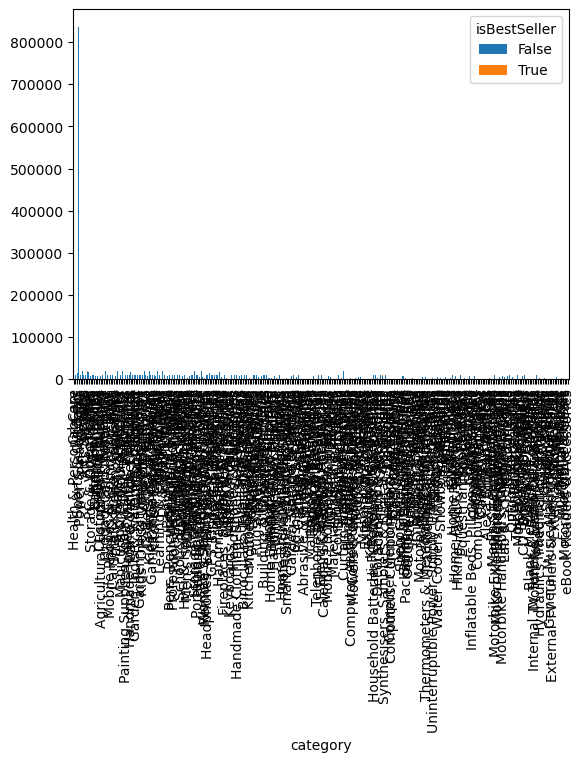

In [38]:
# 3. **Visualizations**:
# 	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab_result_1.plot(kind="bar", stacked=True)


In [57]:
# ### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

# **Objective**: Investigate how different product categories influence product prices.

# 0. **Preliminary Step: Remove outliers in product prices.**

def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

data_series = df["price"]  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


In [61]:
filtered_df = df[~df["price"].isin(outliers)]
filtered_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [73]:
filtered_df_20 = filtered_df["category"].value_counts().head(20).index
filtered_df_20

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor',
       'Luggage and travel gear', 'Women', 'Fragrances',
       'Handmade Kitchen & Dining', 'Handmade Artwork',
       'Handmade Home & Kitchen Products', 'Handmade Jewellery', 'Men',
       'Baby'],
      dtype='object', name='category')

In [70]:
filtered_df = filtered_df[filtered_df["category"].isin(filtered_df_20)]
filtered_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


In [52]:
df = df[df['category'] != 'Sports & Outdoors']


category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Step 2: Get the top 5 categories based on count
top_categories = category_counts.nlargest(4, 'count')['category']
top_categories

filtered_df = df[df['category'].isin(top_categories)]
filtered_df["category"].unique()


array(['Birthday Gifts', 'Bath & Body', 'Beauty',
       'Handmade Clothing, Shoes & Accessories'], dtype=object)

C:\Users\Srnzzz\AppData\Local\Temp\ipykernel_26896\169488471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_df, x='category', y='price', palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Handmade Home & Kitchen Products'),
  Text(1, 0, 'Sports & Outdoors'),
  Text(2, 0, 'Handmade Gifts'),
  Text(3, 0, 'Fragrances'),
  Text(4, 0, 'Skin Care'),
  Text(5, 0, 'Birthday Gifts'),
  Text(6, 0, 'Handmade Kitchen & Dining'),
  Text(7, 0, 'Bath & Body'),
  Text(8, 0, 'Manicure & Pedicure Products'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Handmade Artwork'),
  Text(11, 0, 'Make-up'),
  Text(12, 0, 'Baby'),
  Text(13, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(14, 0, 'Handmade Home Décor'),
  Text(15, 0, 'Men'),
  Text(16, 0, 'Luggage and travel gear'),
  Text(17, 0, 'Handmade Jewellery'),
  Text(18, 0, 'Women'),
  Text(19, 0, 'Hair Care')])

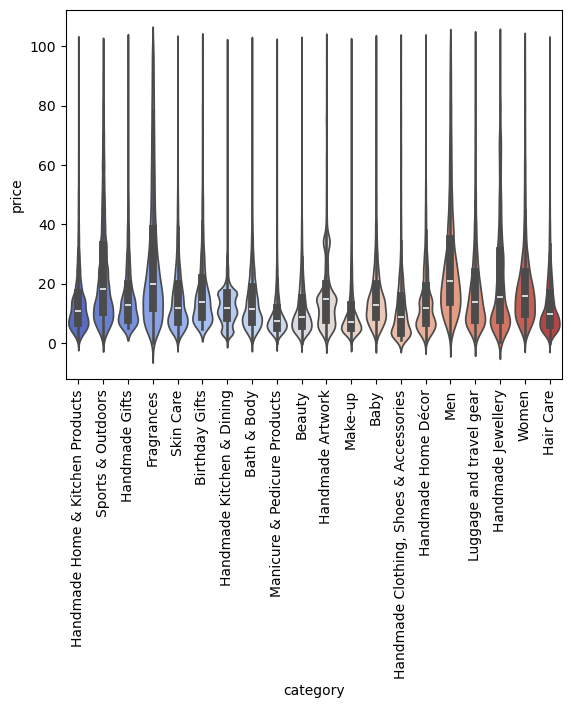

In [71]:
# 1. **Violin Plots**:
#    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
#    - Which product category tends to have the highest median price? Don't filter here by top categories.

# Group by 'category' and count occurrences, then filter where count is greater than 100

sns.violinplot(data=filtered_df, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=90)


C:\Users\Srnzzz\AppData\Local\Temp\ipykernel_26896\1368996499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='category', y='price', palette="coolwarm")


<Axes: xlabel='category', ylabel='price'>

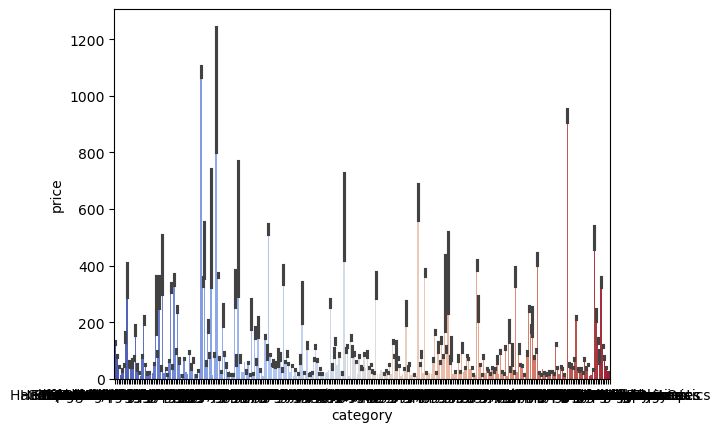

In [54]:
# 2. **Bar Charts**:
#    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
#    - Which product category commands the highest average price? Don't filter here by top categories.

sns.barplot(data=df, x='category', y='price', palette="coolwarm")


In [ ]:
# 3. **Box Plots**:
#    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
#    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.





